In [4]:
from hoki import load
import pandas as pd
import matplotlib.pyplot as plt

Loading the binary and single star population transient rates. Note we chose this particular IMF and metallicity in order to reproduce the plot shown on the left hand sife of Figure 1 in Eldridge et al. 2018

In [10]:
bin_rates = load.model_output('data/supernova-bin-imf135_300.z002.dat')

bin_rates.head()

,log_age,Ia,IIP,II,Ib,Ic,LGRB,PISNe,low_mass,e_Ia,e_IIP,e_II,e_Ib,e_Ic,e_LGRB,e_PISNe,e_low_mass,age_yrs
0,6.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,1122019.00
1,6.1,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,290520.12
2,6.2,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,365743.12
3,6.3,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,460443.62
4,6.4,0.0,0.0,0.0,3.847896,0.0,0.0,5.109734,0.0,0.0,0.0,0.0,0.496761,0.0,0.0,0.80792,0.0,579664.00


Most column names are pretty self-explanatory, appart from `low_mass`, which just detones the rate of low-mass supernovae (< 2M⊙). The `age_yrs` bin is the size of each time bin in years; indeed since BPASS works in log(time) space, each time bin has a different width in years.

In [14]:
# The last time bin in BPASS does some weird stuff so it's better to just ignore it.
bin_rates = bin_rates[:-1]

# We are going to use the log_age and the size of the bin in years a lot, so I'm just renaming them for ease.
age = bin_rates.log_age.values
bin_size = bin_rates.age_yrs.values

### Core Collapse Supernovae rates

Core collapse supernovae comprise the type IIP, II, Ib and Ic. To get the total rate we need to sum these columns as well as put the single star and binary populations together.

In [21]:
ccsne = ( bin_rates[['IIP', 'II', 'Ib', 'Ic']].sum(axis=1))

In [25]:
ccsne_norm = ccsne/bin_size/(10**6)
typeIa_norm = bin_rates.Ia.values /bin_size/(10**6)
lgrbs_norm = bin_rates.LGRB.values /bin_size/(10**6)
pisne_norm = bin_rates.PISNe.values/bin_size/(10**6)

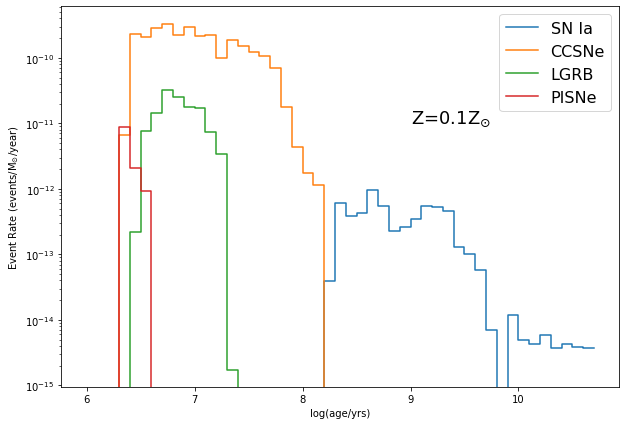

In [26]:
plt.figure(figsize = (10,7))

plt.step(age, typeIa_norm, label='SN Ia')
plt.step(age, ccsne_norm, label='CCSNe')
plt.step(age, lgrbs_norm, label='LGRB')
plt.step(age, pisne_norm, label='PISNe')

plt.yscale("log")

plt.text(9, 10**(-11), r"Z=0.1Z$_{\odot}$", fontsize=18)

plt.ylabel(r"Event Rate (events/M$_{\odot}$/year)")
plt.xlabel("log(age/yrs)")
plt.legend(fontsize=16)

For a different metallicity

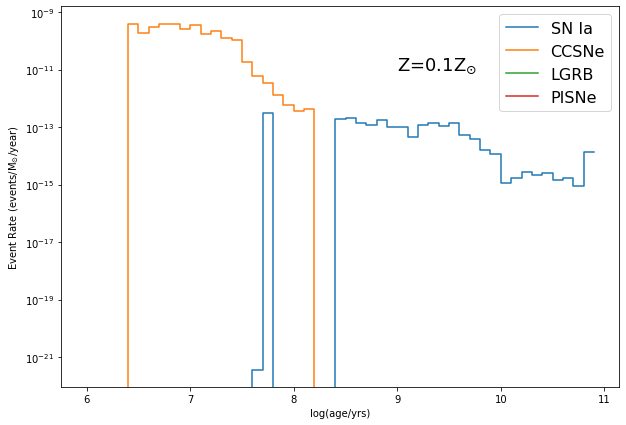

In [40]:
# !gunzip data/supernova-bin-imf135_300.z040.dat.gz
bin_rates = load.model_output('data/supernova-bin-imf135_300.z040.dat')

bin_rates = bin_rates[:-1]
age = bin_rates.log_age.values
bin_size = bin_rates.age_yrs.values

ccsne = ( bin_rates[['IIP', 'II', 'Ib', 'Ic']].sum(axis=1))
ccsne_norm = ccsne/bin_size/(10**6)
typeIa_norm = bin_rates.Ia.values /bin_size/(10**6)
lgrbs_norm = bin_rates.LGRB.values /bin_size/(10**6)
pisne_norm = bin_rates.PISNe.values/bin_size/(10**6)

plt.figure(figsize = (10,7))

plt.step(age, typeIa_norm, label='SN Ia')
plt.step(age, ccsne_norm, label='CCSNe')
plt.step(age, lgrbs_norm, label='LGRB')
plt.step(age, pisne_norm, label='PISNe')

plt.yscale("log")

plt.text(9, 10**(-11), r"Z=0.1Z$_{\odot}$", fontsize=18)

plt.ylabel(r"Event Rate (events/M$_{\odot}$/year)")
plt.xlabel("log(age/yrs)")
plt.legend(fontsize=16)

For a range of metallicities

In [88]:
import glob
import os

import matplotlib
cmap='viridis'

import numpy as np

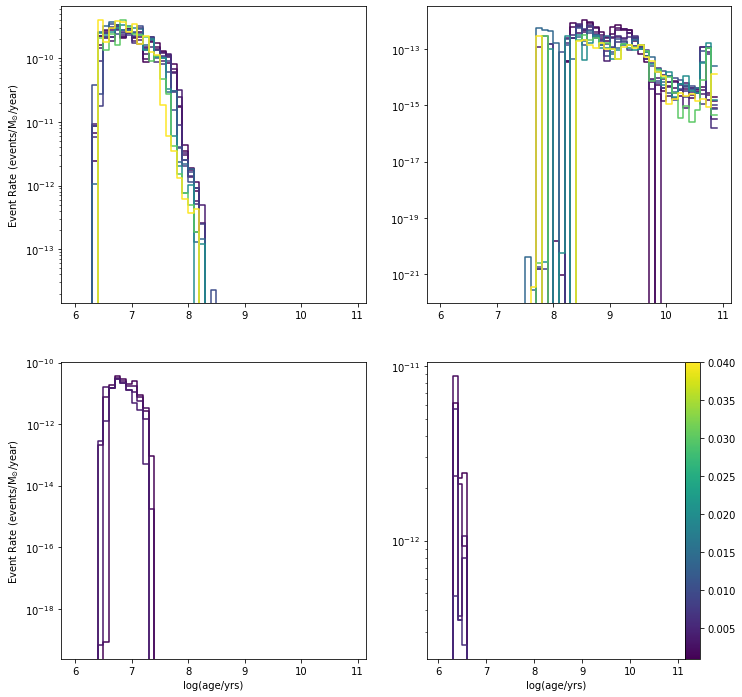

In [104]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(12,12))

## colorbar
Z_range = np.linspace(0.001,0.040)

norm = matplotlib.colors.Normalize() #LogNorm()
norm.autoscale(Z_range)
sm = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
sm._A = []
cb = fig.colorbar(sm, orientation='vertical', pad=0)

for i,f in enumerate(sorted(glob.glob('data/supernova-bin-imf135_300.z0*'))):

    os.system('gunzip %s'%f)
    
    Z = "0.%s"%f[31:34]
    
    bin_rates = load.model_output(f)

    bin_rates = bin_rates[:-1]
    age = bin_rates.log_age.values
    bin_size = bin_rates.age_yrs.values

    ccsne = ( bin_rates[['IIP', 'II', 'Ib', 'Ic']].sum(axis=1))
    ccsne_norm = ccsne/bin_size/(10**6)
    typeIa_norm = bin_rates.Ia.values /bin_size/(10**6)
    lgrbs_norm = bin_rates.LGRB.values /bin_size/(10**6)
    pisne_norm = bin_rates.PISNe.values/bin_size/(10**6)
    
    ax1.step(age, ccsne_norm, label="%sZ$_{\odot}$"%Z, color=sm.to_rgba(float(Z)))
    ax2.step(age, typeIa_norm, label="%sZ$_{\odot}$"%Z, color=sm.to_rgba(float(Z)))
    ax3.step(age, lgrbs_norm, label="%sZ$_{\odot}$"%Z, color=sm.to_rgba(float(Z)))
    ax4.step(age, pisne_norm, label="%sZ$_{\odot}$"%Z, color=sm.to_rgba(float(Z)))
    

for ax in [ax1,ax2,ax3,ax4]: ax.set_yscale("log")

for ax in [ax1,ax3]: ax.set_ylabel(r"Event Rate (events/M$_{\odot}$/year)")
for ax in [ax4,ax3]: ax.set_xlabel("log(age/yrs)")
# plt.legend(fontsize=16)